In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [93]:
datas=sns.load_dataset('penguins')
datas


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [94]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [95]:
datas.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [96]:
datas.describe(include='O')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


### EDA

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

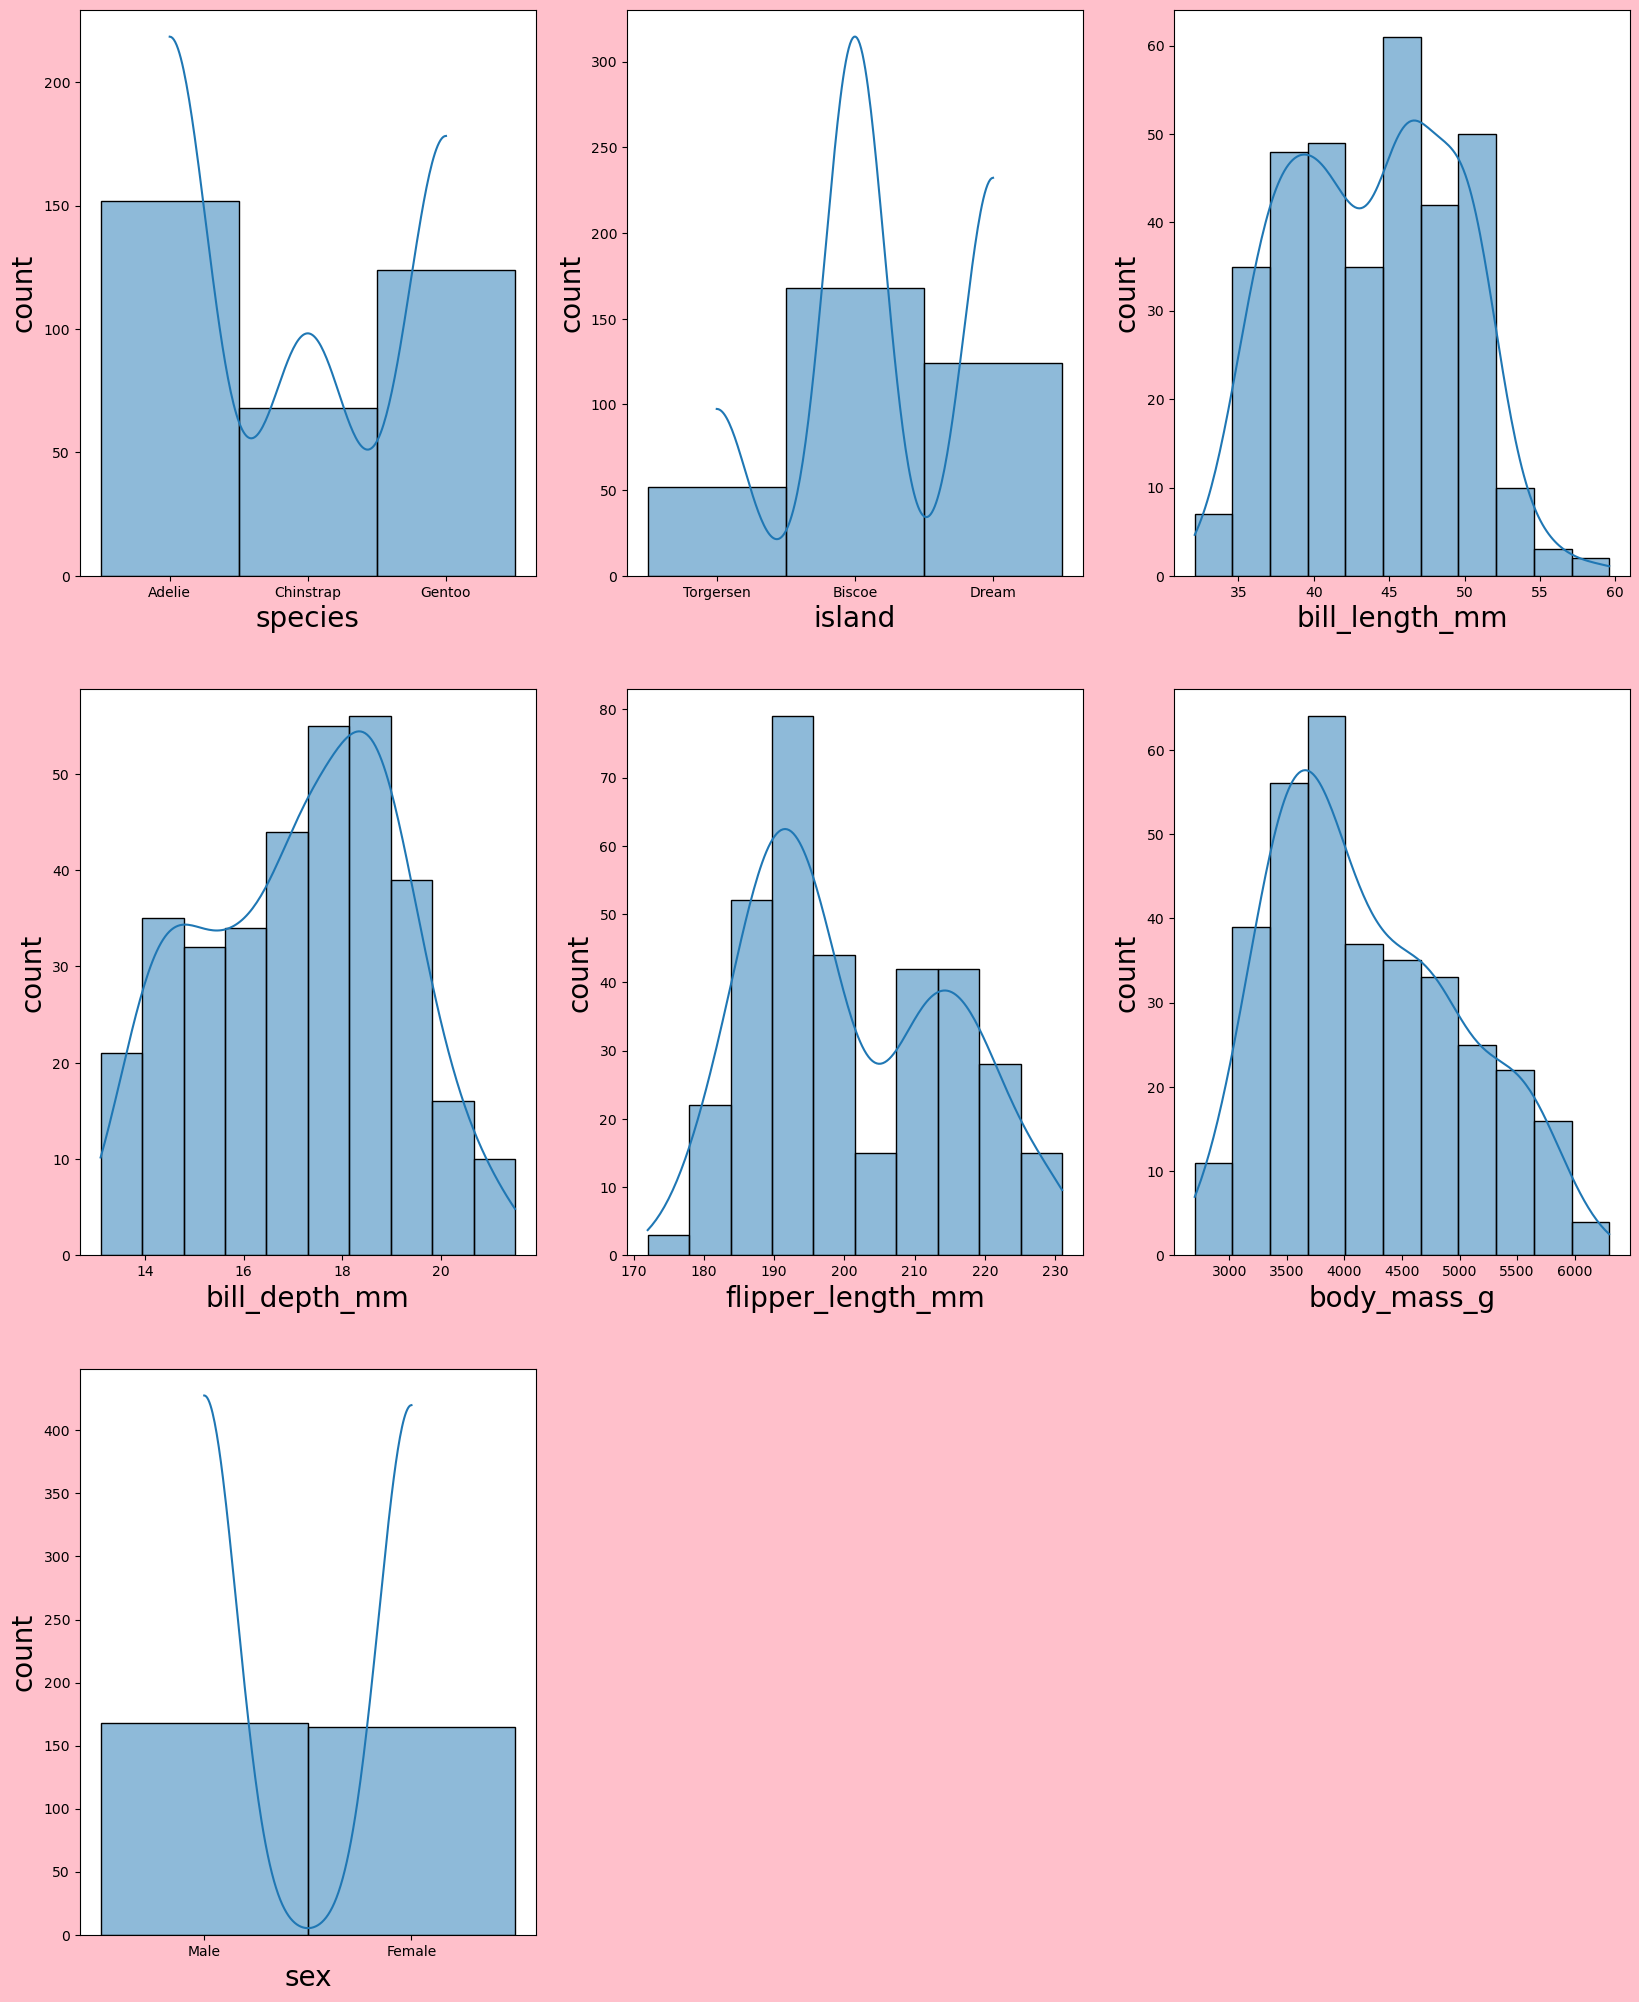

In [97]:
# univarance

plt.figure(figsize=(20,25),facecolor='pink')
plot=1

for column in datas:
    if plot <=7:
        ax=plt.subplot(3,3,plot)
        sns.histplot(datas[column],kde=True)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('count', fontsize=20)
        plot+=1
plt.tight_layout

C:\Users\sadiamankar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


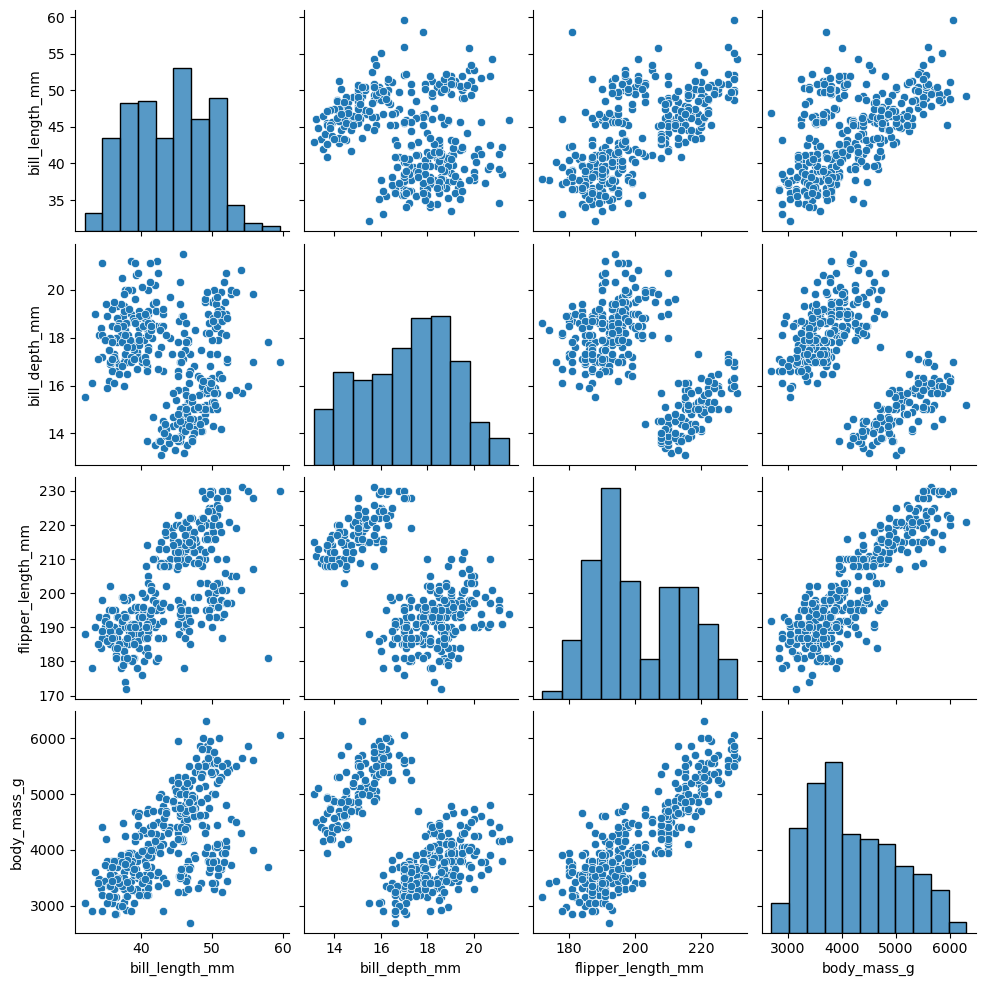

In [98]:
sns.pairplot(datas)

### Data preprocessing 

In [99]:
datas.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [100]:
missing=np.where(datas['bill_length_mm'].isnull()==True)
missing

(array([  3, 339], dtype=int64),)

In [101]:
datas.iloc[missing]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [102]:
dat=datas.fillna(method='ffill')

In [103]:
dat

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [104]:
dat.iloc[missing]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
339,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female


In [105]:
dat.describe(include='O')

,species,island,sex
count,344,344,344
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,177


In [106]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(dat['sex'])
label

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [107]:
dat['sex']=label
dat

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0


In [108]:
da=dat.drop(['species','island'], axis=1)

In [109]:
da.head(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0


In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
da['bill_length_mm']=scaler.fit_transform(da['bill_length_mm'].values.reshape(-1,1))
da['bill_depth_mm']=scaler.fit_transform(da['bill_depth_mm'].values.reshape(-1,1))
da['flipper_length_mm']=scaler.fit_transform(da['flipper_length_mm'].values.reshape(-1,1))
da['body_mass_g']=scaler.fit_transform(da['body_mass_g'].values.reshape(-1,1))

In [111]:
da

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.254545,0.666667,0.152542,0.291667,1
1,0.269091,0.511905,0.237288,0.305556,0
2,0.298182,0.583333,0.389831,0.152778,0
3,0.298182,0.583333,0.389831,0.152778,0
4,0.167273,0.738095,0.355932,0.208333,0
...,...,...,...,...,...
339,0.549091,0.071429,0.711864,0.618056,0
340,0.534545,0.142857,0.728814,0.597222,0
341,0.665455,0.309524,0.847458,0.847222,1
342,0.476364,0.202381,0.677966,0.694444,0


In [112]:
from sklearn.decomposition import PCA
d1=da[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']]
pca=PCA(n_components=None)
pca_d1=pd.DataFrame(pca.fit_transform(d1))
pca.explained_variance_

array([0.27798622, 0.13279024, 0.02339392, 0.01181791, 0.00557426])

In [113]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=10)
model.fit(pca_d1)

C:\Users\sadiamankar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sadiamankar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [114]:
model.cluster_centers_

array([[ 4.46002629e-01,  3.26190156e-01,  1.21421179e-02,
        -1.03991801e-02, -1.17286598e-03],
       [-5.34164202e-01, -5.71780374e-02,  9.26112837e-03,
         4.87907952e-03,  6.48789754e-04],
       [ 6.03894266e-01, -4.15147157e-01, -4.47157790e-02,
         5.38310607e-03,  3.54047712e-04]])

In [115]:
model.labels_

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1,

In [116]:
pca_d1['group']=pd.DataFrame(model.labels_)

In [117]:
pca_d1

,0,1,2,3,4,group
0,0.358557,0.512388,-0.149655,-0.094031,0.090954,0
1,-0.574625,0.157332,-0.019610,0.038285,0.105941,1
2,-0.569523,0.172037,0.067146,0.053689,-0.105134,1
3,-0.569523,0.172037,0.067146,0.053689,-0.105134,1
4,-0.566645,0.292480,0.027344,0.221084,-0.070437,1
...,...,...,...,...,...,...
339,-0.424552,-0.594019,-0.019683,-0.029859,0.045906,1
340,-0.420425,-0.549786,0.007505,0.018330,0.014283,1
341,0.634484,-0.474710,-0.016262,0.042170,0.057754,2
342,-0.409942,-0.514953,-0.025512,0.109519,0.105041,1


In [118]:
wscc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=10)
    kmeans.fit(pca_d1)
    wscc.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [119]:
label=model.labels_
label
from sklearn.metrics import silhouette_score
score=silhouette_score(pca_d1,label)
score

0.7293131565177221

### Using StandardScaler

In [120]:
from sklearn.preprocessing import StandardScaler
SD=StandardScaler()
x=SD.fit_transform(da)
data=pd.DataFrame(data=x,columns=da.columns)

In [144]:
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.885858,0.787863,-1.421806,-0.563126,0.971341
1,-0.812357,0.129790,-1.065214,-0.500708,-1.029505
2,-0.665355,0.433516,-0.423349,-1.187309,-1.029505
3,-0.665355,0.433516,-0.423349,-1.187309,-1.029505
4,-1.326864,1.091589,-0.565986,-0.937636,-1.029505
...,...,...,...,...,...
339,0.602537,-1.743188,0.931699,0.903705,-1.029505
340,0.529036,-1.439461,1.003018,0.810077,-1.029505
341,1.190545,-0.730767,1.502246,1.933608,0.971341
342,0.235032,-1.186356,0.789063,1.247006,-1.029505


In [190]:
pca1 = PCA(n_components=4)
pca_data = pca.fit(data)
pca_data=pd.DataFrame(pca.fit_transform(data))
pca.explained_variance_

array([2.8450019 , 1.38961151, 0.48916363, 0.18660831, 0.1041919 ])

In [191]:
Model=KMeans(n_clusters=10,random_state=42)
Model.fit(pca_data)

C:\Users\sadiamankar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sadiamankar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [192]:
Model.cluster_centers_

array([[-2.10253678, -1.02103277, -0.16215108, -0.20993734, -0.0607502 ],
       [ 2.16082952,  0.17447865, -0.52844466, -0.37839095, -0.03801263],
       [-0.61083479,  1.39027315, -0.50332039,  0.19524184,  0.04851759],
       [ 0.83641759, -1.85209232, -0.09378856, -0.23337442, -0.10088003],
       [ 0.22884735,  1.61333436,  1.10476132, -0.17724207, -0.16209099],
       [-1.8167233 , -0.6282429 , -0.08181567,  0.40695968, -0.00331201],
       [ 1.41120116, -1.62535559,  0.08353963,  0.16157827,  0.0775369 ],
       [-0.79222959, -0.47203416,  1.27151691,  0.09490882,  0.11839775],
       [ 2.96185541,  0.53818742, -0.17216304,  0.22326065,  0.00940267],
       [-1.35404094,  1.07664865, -0.66949147, -0.45369807,  0.04861647]])

In [193]:
Model.labels_

array([9, 5, 5, 5, 5, 9, 5, 2, 9, 2, 9, 9, 0, 2, 2, 5, 5, 2, 5, 2, 0, 9,
       5, 9, 9, 5, 9, 5, 0, 9, 0, 9, 5, 9, 0, 2, 2, 5, 5, 2, 0, 2, 5, 2,
       0, 2, 9, 9, 5, 2, 5, 2, 5, 2, 0, 9, 5, 9, 0, 9, 0, 2, 0, 2, 0, 9,
       0, 2, 0, 2, 5, 9, 5, 2, 5, 2, 5, 9, 0, 2, 0, 2, 5, 9, 5, 2, 9, 5,
       9, 5, 5, 2, 0, 9, 0, 2, 5, 2, 0, 2, 5, 2, 0, 2, 5, 9, 5, 9, 0, 2,
       5, 2, 5, 2, 5, 2, 0, 2, 0, 9, 0, 9, 0, 2, 0, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 5, 9, 0, 2, 0, 2, 5, 9, 0, 9, 0, 9, 2, 5, 5, 9, 5, 2, 7, 4,
       4, 7, 4, 7, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 4, 7, 7, 4, 5, 4, 0, 4,
       7, 4, 7, 4, 7, 4, 0, 4, 0, 4, 4, 7, 7, 4, 7, 4, 4, 7, 4, 7, 7, 4,
       7, 4, 4, 7, 7, 4, 7, 4, 5, 4, 7, 4, 4, 7, 4, 7, 7, 4, 7, 4, 4, 7,
       3, 8, 6, 8, 1, 3, 6, 1, 3, 1, 3, 1, 6, 1, 3, 8, 3, 8, 6, 1, 1, 6,
       6, 1, 6, 1, 1, 1, 6, 8, 1, 3, 6, 8, 6, 8, 6, 1, 3, 1, 3, 8, 3, 1,
       8, 6, 3, 8, 6, 1, 6, 1, 3, 1, 6, 1, 3, 1, 3, 8, 3, 1, 3, 8, 6, 8,
       1, 8, 6, 8, 6, 1, 1, 6, 6, 8, 6, 8, 6, 8, 6,

In [194]:
pca_data['group']=pd.DataFrame(Model.labels_)

In [195]:
pca_data

,0,1,2,3,4,group
0,-1.587130,1.166195,-0.590967,-0.565977,0.372898,9
1,-1.516414,-0.754177,-0.017947,0.169905,0.473871,5
2,-1.569539,-0.631559,0.337688,0.338529,-0.434151,5
3,-1.569539,-0.631559,0.337688,0.338529,-0.434151,5
4,-2.042759,-0.293971,-0.156727,0.924814,-0.269052,5
...,...,...,...,...,...,...
339,1.681638,-1.806258,0.111871,-0.043914,0.203631,6
340,1.532393,-1.635792,0.136464,0.161811,0.072313,6
341,2.923431,0.436943,-0.299293,0.083037,0.238048,8
342,1.430809,-1.478463,-0.187609,0.457324,0.472014,6


In [196]:
Label=Model.labels_
Label
from sklearn.metrics import silhouette_score
score=silhouette_score(pca_data,Label)
score

0.6924266904214321